In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# import plotting libraries
import matplotlib.pyplot as plt

1...50: 
      Average, standard deviation, min, max and median of the 
      Attributes 51...60 for the source of the current blog post
      With source we mean the blog on which the post appeared. 
      For example, myblog.blog.org would be the source of 
      the post myblog.blog.org/post_2010_09_10 
      
51:   Total number of comments before basetime

52:   Number of comments in the last 24 hours before the 
      basetime
      
53:   Let T1 denote the datetime 48 hours before basetime,
      Let T2 denote the datetime 24 hours before basetime.
      This attribute is the number of comments in the time period 
      between T1 and T2
      
54:   Number of comments in the first 24 hours after the 
      publication of the blog post, but before basetime
      
55:   The difference of Attribute 52 and Attribute 53

56...60: 
      The same features as the attributes 51...55, but  
      features 56...60 refer to the number of links (trackbacks), 
      while features 51...55 refer to the number of comments.
      
61:   The length of time between the publication of the blog post 
      and basetime
      
62:   The length of the blog post

**63...262: 
      The 200 bag of words features for 200 frequent words of the 
      text of the blog post**
      
263...269: binary indicator features (0 or 1) for the weekday
      (Monday...Sunday) of the basetime
      
270...276: binary indicator features (0 or 1) for the weekday
      (Monday...Sunday) of the date of publication of the blog
      post
      
277:  Number of parent pages: we consider a blog post P as a
      parent of blog post B, if B is a reply (trackback) to 
      blog post P.
      
278...280:  
      Minimum, maximum, average number of comments that the 
      parents received
      
281:  The target: the number of comments in the next 24 hours
      (relative to basetime)

In [73]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/gridflowai/gridflowAI-datasets-icons/master/AI-DATASETS/01-MISC/blogfeedback/blogData_train.csv"
df = pd.read_csv(data_url, header=None)

In [76]:
df.shape

(52397, 281)

In [77]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
39715,0.500000,0.763763,0.0,2.0,0.0,0.250000,0.433013,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11692,546.629900,355.350340,0.0,2044.0,509.0,231.590620,227.521200,0.0,1370.0,186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5154,122.812930,109.961100,0.0,1069.0,89.0,44.894543,74.547530,0.0,1046.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33088,56.512093,77.442830,0.0,438.0,32.0,19.296530,49.221344,0.0,432.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44362,3.341772,8.307212,0.0,50.0,2.0,1.354430,5.730306,0.0,48.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df.values[:10, 65:190]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
276    float64
277    float64
278    float64
279    float64
280    float64
Length: 281, dtype: object

#### check null values

In [80]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
276    0
277    0
278    0
279    0
280    0
Length: 281, dtype: int64

In [81]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Count of NANs'])
NAs.sample(5)

,Count of NANs
269,0
213,0
8,0
195,0
40,0


In [82]:
NAs[NAs.sum(axis=1) > 0]

,Count of NANs


In [83]:
y = df.iloc[:, -1]

#### Distribution of y - histogram, normality test, outliers

In [84]:
df.iloc[:, -1].describe()

count    52397.000000
mean         6.764719
std         37.706565
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1424.000000
Name: 280, dtype: float64

In [85]:
from statsmodels.graphics.gofplots import qqplot

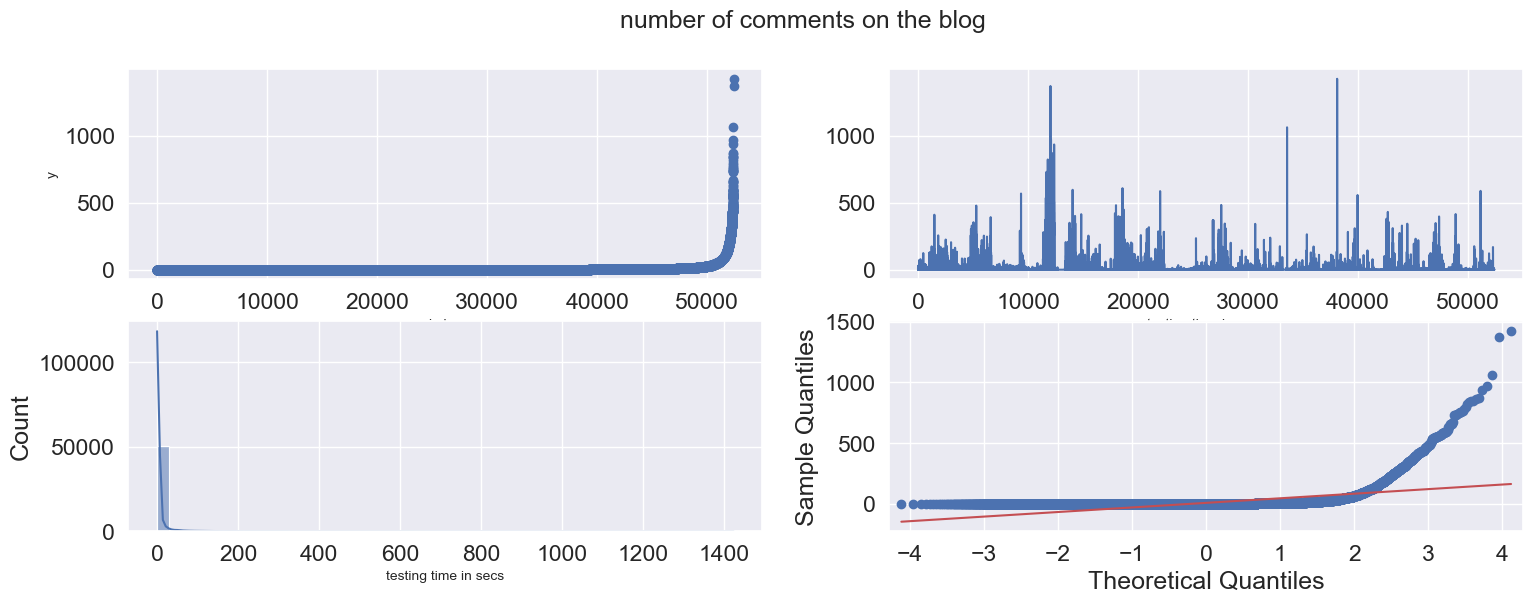

In [86]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))

fig.suptitle ('number of comments on the blog', fontsize=18)

ax1.scatter(range(df.shape[0]), np.sort(df.iloc[:, -1].values))
ax1.set_xlabel('index', fontsize=10)
ax1.set_ylabel('y', fontsize=10)

ax2.plot(df.iloc[:, -1]);
ax2.set_xlabel('testing time in secs', fontsize=10)

sns.histplot(df.iloc[:, -1].values, bins=50, kde=True, ax=ax3)
ax3.set_xlabel('testing time in secs', fontsize=10)

# q-q plot
qqplot(df.iloc[:, -1], line='s', ax=ax4);  #  to see whether the distribution of data follow normal distribution.

In [87]:
from scipy.stats import kurtosis

In [88]:
# Calculate the kurtosis
data_kurtosis = kurtosis(df.iloc[:, -1].values)

print("Kurtosis:", data_kurtosis)

Kurtosis: 232.29540940625407


#### type of columns
let us have a look at the data type of all the variables present in the dataset.

In [89]:
dtype_df = df.dtypes.reset_index()
dtype_df.sample(10)

,index,0
262,262,float64
26,26,float64
27,27,float64
144,144,float64
134,134,float64
62,62,float64
125,125,float64
37,37,float64
145,145,float64
240,240,float64


In [90]:
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head(3)

,Count,Column Type
0,0,float64
1,1,float64
2,2,float64


In [91]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,float64,281


In [122]:
# Split the data into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [110]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [113]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor  = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [114]:
y_test.shape, y_train.shape

((10480,), (41917,))

In [115]:
# Define MLPModel
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(280, 16)
        # self.layer2 = nn.Linear(64, 32)
        # self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        # x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

In [116]:
# Instantiate the model
model = MLPModel()

In [117]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [118]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 1438.5341
Epoch [200/1000], Loss: 1438.5341
Epoch [300/1000], Loss: 1438.5341
Epoch [400/1000], Loss: 1438.5341
Epoch [500/1000], Loss: 1438.5341
Epoch [600/1000], Loss: 1438.5341
Epoch [700/1000], Loss: 1438.5341
Epoch [800/1000], Loss: 1438.5341
Epoch [900/1000], Loss: 1438.5341
Epoch [1000/1000], Loss: 1438.5341


In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
def model_metrics(y_true, y_pred, test='test data'): 
    print("metrics using {} ...".format(test))
    print('Mean Abs Error   MAE    : ', mean_absolute_error(y_true, y_pred))
    print('Mean Sq  Error MSE      : ', mean_squared_error(y_true, y_pred))
    print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_true, y_pred)))
    # print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    # print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)
    print('r2 value                : ', r2_score(y_true, y_pred))

    print('\n')

In [65]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error on Test Data: {mse:.4f}')

Mean Squared Error on Test Data: 1520.5710


In [66]:
model_metrics(y_test, y_pred, test='training data')

metrics using training data ...
Mean Abs Error   MAE    :  6.62645400008395
Mean Sq  Error MSE      :  1520.5709535343904
Root Mean Sq Error RMSE :  38.99449901632781
r2 value                :  -0.021372321581508258




In [119]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
y_pred = dt.predict(X_test)

In [126]:
model_metrics(y_test, y_pred, test='training data')

metrics using training data ...
Mean Abs Error   MAE    :  6.343381043256997
Mean Sq  Error MSE      :  1195.3005075805768
Root Mean Sq Error RMSE :  34.573118279677594
r2 value                :  0.197112866336548




In [131]:
from sklearn.svm import SVC

In [132]:
reg = SVC()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [133]:
model_metrics(y_test, y_pred, test='training data')

metrics using training data ...
Mean Abs Error   MAE    :  6.661736641221374
Mean Sq  Error MSE      :  1533.1315839694657
Root Mean Sq Error RMSE :  39.15522422320508
r2 value                :  -0.029809336794892616




In [134]:
!pip install lightgbm